<a href="https://colab.research.google.com/github/enzoulian/vacina-bcg-tuberculose/blob/main/notebooks/dsa_proj_modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Dados sobre a Tuberculose e a Vacina BCG**

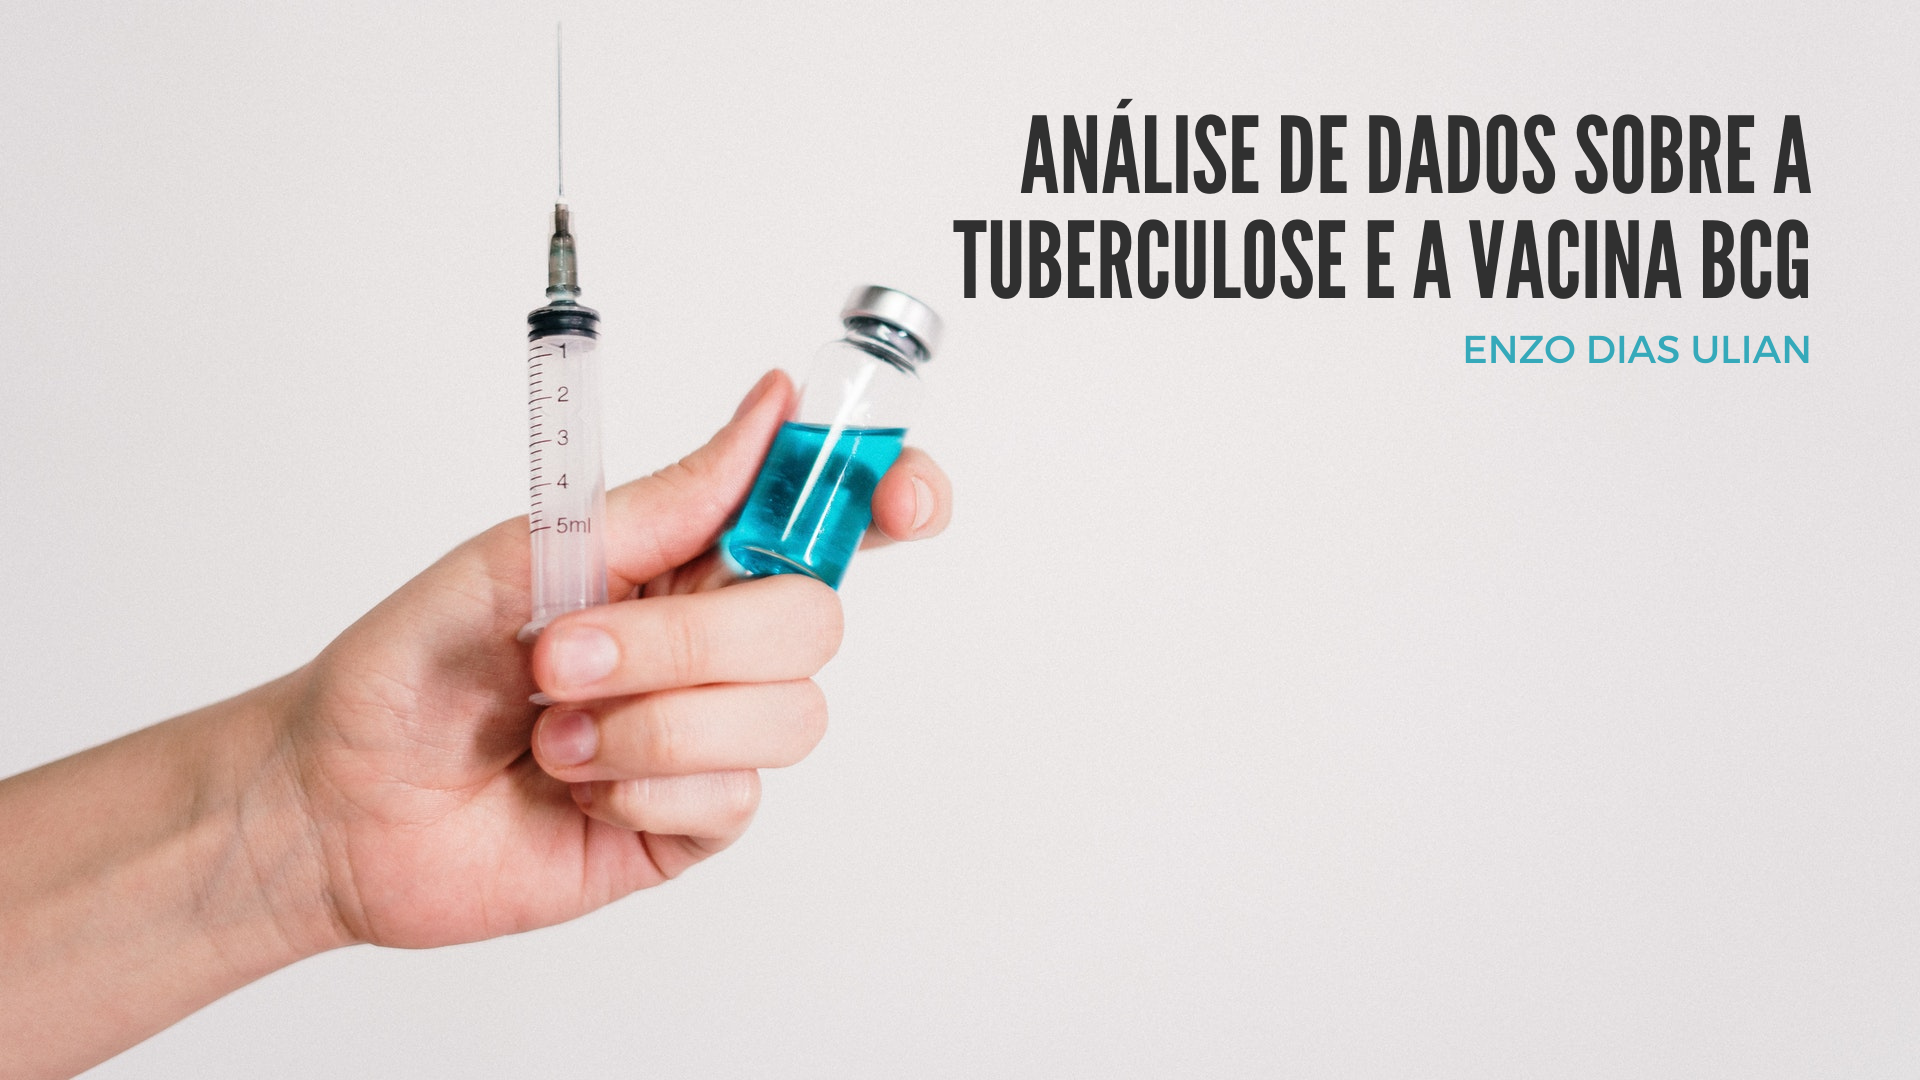

#Introdução

A **tuberculose** é uma doença bacteriana infecciosa causada pela bactéria *Mycobacterium tuberculosis*, que afeta principalmente os pulmões e também pode atingir outros órgãos, tais como ossos, rins e sistema nervoso. Segundo a **Organização Mundial da Saúde** (OMS), em 2015 foi estimado o número de 10,4 milhões de casos e 1,4 milhões de óbitos pela doença. No mundo, é a enfermidade infecciosa que mais **mata**, e no **Brasil** ela ocupa a terceira posição. [[2]](https://familia.sbim.org.br/doencas/tuberculose-tb)

A pessoa contaminada com **tuberculose** apresenta diversos sintomas graves, principalmente tosse, falta de ar, dores no peito, expectoração de sangue, entre outros. Há situações em que a pessoa contrai a doença, e não apresenta sintomas, porém ainda é possível a transmissão. Felizmente, a **tuberculose** tem cura, e se dá pelo tratamento com medicamentos durante alguns meses. [[2]](https://familia.sbim.org.br/doencas/tuberculose-tb)


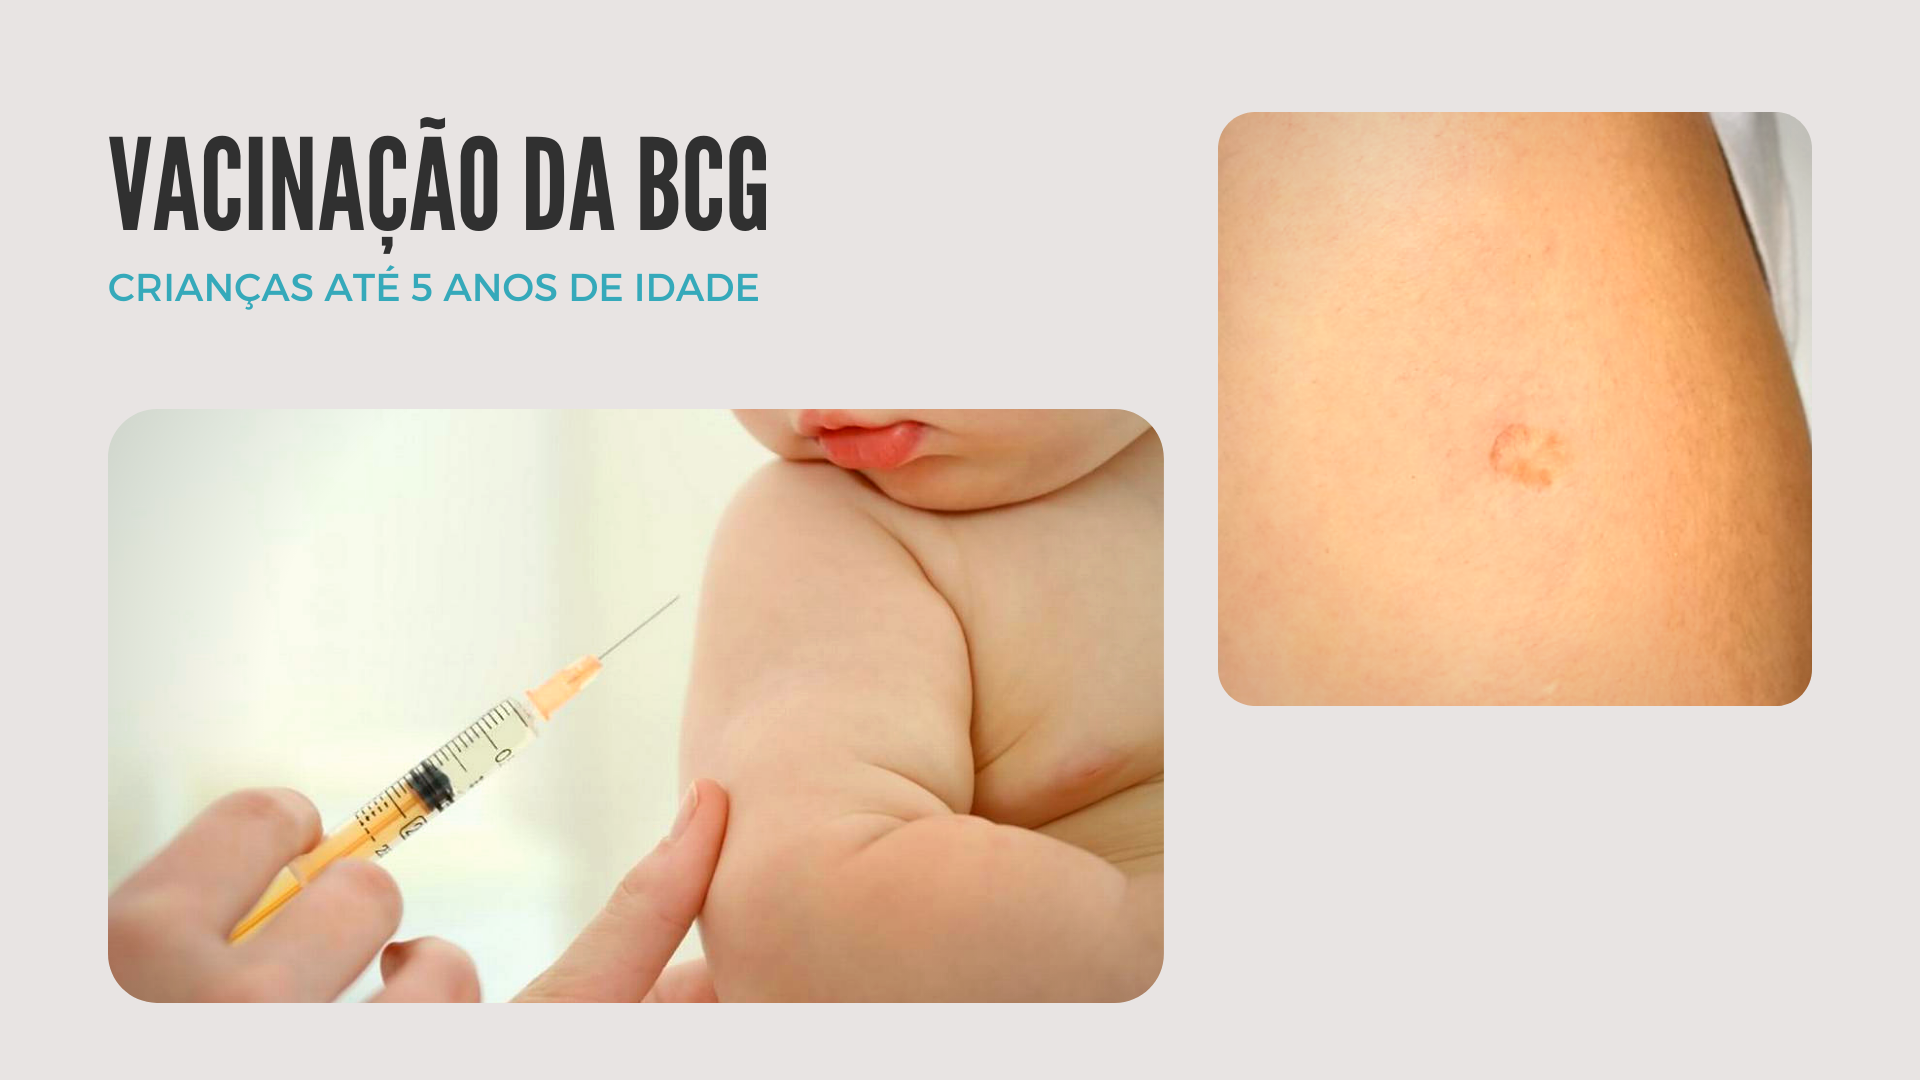

A forma de **prevenção** atualmente é a **vacina BCG** (bacilo de *Calmette-Guérin*), obtida através do enfraquecimento de umas das bactérias que causam a tuberculose. [[1]](https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-bcg)

A vacinação é indicada para: [[1]](https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-bcg)
* Crianças de até **cinco anos** de idade, e pessoas com qualquer idade
* Portadores de **hanseníase**. 

E, contraindicada para: [[1]](https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-bcg)
* Pessoas imunodeprimidas
* Recém nascidos de mães que utilizaram medicamentos contra imunodepressão
* Crianças prematuras que tenham menos de 2 kg de peso

Um dos principais **efeitos colaterais** da vacina é uma **cicatriz** característica, no local em que foi aplicada, com um tamanho de até 1cm de diâmetro. Essa cicatriz se inicia com uma **mancha vermelha** elevada, que acaba evoluindo de tamanho e produzido secreção, e posteriormente diminuindo e formando a cicatriz. [[1]](https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-bcg)

É importante salientar que a vacina não garante 100% de proteção na prevenção da **tuberculose pulmonar**, entretanto, a aplicação em massa na população permite a prevenção das variações mais graves da doença, como a **meningite tuberculosa** e a **tuberculose miliar**. A Organização Mundial da Saúde estima que, em países que há a **vacinação** constante nas **crianças**, previne-se mais de **40 mil** casos por ano da **meningite tuberculosa**. [[1]](https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-bcg)

#DATASUS e a Tuberculose

Para coletar os **dados** sobre a Tuberculose e demais assuntos, foi utilizado o sistema **TabNet**, fornecido pelo **DATASUS**. [[3]](http://www2.datasus.gov.br/DATASUS/index.php?area=01)

O **DATASUS** é o Departamento de Informática do SUS (Sistema Único de Saúde), ele é responsável desenvolver, pesquisar e incorporar produtos e serviços de Tecnologia da Informação ao sistema. [[3]](http://www2.datasus.gov.br/DATASUS/index.php?area=01)

Para coletar os dados e realizar as devidas pesquisas, utilizamoos **TabNet**, que é uma ferramenta de domínio público desenvolvida pelo **DATASUS** que organiza e disponibiliza diversos dados relacionados ao Sistema Único de Saúde. [[4]](http://www2.datasus.gov.br/DATASUS/APRESENTACAO/TABNET/Tutorial_tabNet_FINAL.pptx_html/html/index.html#2)

## Procedimento de coleta

Para realizar a coleta dos dados na plataforma do **TabNet**, foram feitos alguns filtros e baixado diferentes base de dados.

[**Imunizações - Cobertura - Brasil:**](http://www2.datasus.gov.br/DATASUS/index.php?area=01)

**Filtro:** Unidade da Federação > Ano > Doses Cálculos CV

**Imuno:** 072 BCG

**Período:** 1994-2019



---

[**Tuberculose - Casos confirmados notificados no sistema de informação de agravos de notificação - Brasil:**](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/tubercbr.def)

**Filtro:** UF de Notificação > Ano Diagnóstico > Casos confirmados

**Período:** 2001-2020

---

[**Tuberculose - Casos confirmados notificados no sistema de informação de agravos de notificação - Brasil:**](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/tubercbr.def)

**Filtro:** UF de Notificação > Sexo > Casos confirmados

**Período:** 2001-2019

---

[**Tuberculose - Casos confirmados notificados no sistema de informação de agravos de notificação - Brasil:**](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/tubercbr.def)

**Filtro:** UF de Notificação > Fx Etária > Casos confirmados

**Período:** 2001-2019


##Limpeza dos dados

Os arquivos de dados utilizados neste projeto, foi passado previamente por um processo de filtragem e padronização. O arquivo `dsa-proj-m2-limpeza.ipynb` é responsável por importar os dados baixados do **TabNet**, remover as linhas e colunas não utilizáveis e padronizar o nome das colunas e tipo de dados.

Os dados do DataFrame **Imunização - Cobertura** possuem dados de 1994 a 2019. Já os dados de **casos confirmados** tinham informações de 2001 a 2020. Com isso, filtramos os dois DataFrames para que possuissem dados do mesmo período, deixando ambos com dados entre **2001 a 2019**.

#Configurações

##Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

##Parâmetros de Gráficos

In [2]:
plt.rcParams['figure.figsize'] = (15,6)

##Funções

###plot_simples()

Plotagem de um gráfico simples.

In [3]:
def plot_simples(df,titulo,label_x,label_y, tipo):
  ax = df.plot(kind=tipo)
  #ax.legend()
  #ax.grid(color='w', linestyle='-', linewidth=1, alpha = 0.1)
  plt.title(titulo, fontsize=20, color = '#303030')
  plt.xlabel(label_x, fontsize=14, color = '#303030')
  plt.ylabel(label_y, fontsize=14, color = '#303030')
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
  plt.ylim(0,)
  plt.grid(linestyle='--')
  plt.show()
  #35A9BA

###barplot_sns()
Plotagem do barplot da biblioteca do Seaborn padronizado

In [4]:
def barplot_sns(df,titulo,label_x,label_y, dado_x, dado_y, dado_hue,rotacao_x):
  sns.barplot(data=df,x=dado_x, y=dado_y, hue=dado_hue)
  #ax.legend()
  #ax.grid(color='w', linestyle='-', linewidth=1, alpha = 0.1)
  plt.title(titulo, fontsize=22, color = '#303030')
  plt.xlabel(label_x, fontsize=12, color = '#303030')
  plt.ylabel(label_y, fontsize=12, color = '#303030')
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
  plt.ylim(0,)
  plt.grid(linestyle='--', axis='y')
  plt.xticks(rotation=rotacao_x)
  plt.show()

###pop_estado()

Faz o merge da série de um Estado com os dados de população.

In [5]:
def pop_estado(dados_pop, dados_estado):
  #for estado in dados_estado.index:
   # dados_pop.index = dados_pop.index.str.replace(f'{estado} {estado}', estado)
  #dados_pop.index

  unida = dados_pop.join(dados_estado)

  return unida

##Importando DataFrames

In [6]:
url = "https://github.com/enzoulian/vacina-bcg-tuberculose/raw/main/dados/limpo/limpo-vacina.csv"
df_cv = pd.read_csv(url, index_col='uf')
df_cv.head()

2001    2002    2003    2004  ...    2016    2017    2018   2019
uf                                        ...                               
Rondônia   35213   32122   31107   30836  ...   28900   27104   24805  14635
Acre       20105   21053   19352   19048  ...   16939   16345   15839   9720
Amazonas   84517   85867   89590   84632  ...   77405   75738   74056  45990
Roraima    10048   10510   10705    9498  ...   11985   12974   15138   8683
Pará      183776  200764  197849  183739  ...  116950  121313  115103  64516

[5 rows x 19 columns]

In [7]:
url = "https://github.com/enzoulian/vacina-bcg-tuberculose/raw/main/dados/limpo/limpo-casos.csv"
df_casos = pd.read_csv(url, index_col='uf')
df_casos.head()

2001  2002  2003  2004  2005  ...  2015  2016  2017  2018  2019
uf                                      ...                              
Rondônia   674   639   651   628   630  ...   665   775   780   678   740
Acre       364   368   368   356   329  ...   361   450   484   483   582
Amazonas  2334  2286  2375  2559  2477  ...  3404  3259  3693  3803  3955
Roraima    150   172   206   218   155  ...   174   160   205   265   324
Pará      3517  3785  3940  4089  3975  ...  3991  4224  4511  4678  5542

[5 rows x 19 columns]

In [8]:
url = "https://github.com/enzoulian/vacina-bcg-tuberculose/raw/main/dados/limpo/limpo-fxetaria.csv"
df_idade = pd.read_csv(url, index_col='uf')
df_idade.head()

<1 Ano  1-4  5-9  10-14  15-19  ...  40-59  60-64  65-69  70-79  80 e +
uf                                        ...                                    
Rondônia      70  142  107    202    788  ...   3728    588    407    518     204
Acre          37   83   65    151    571  ...   1813    304    240    302     140
Amazonas     331  838  744   1232   4561  ...  14482   2422   1901   2527    1233
Roraima       18   59   50     83    240  ...    990    159    116    140      57
Pará         434  579  571   1292   5917  ...  21907   3486   2674   3290    1189

[5 rows x 11 columns]

In [9]:
url = "https://github.com/enzoulian/vacina-bcg-tuberculose/raw/main/dados/limpo/limpo-sexo.csv"
df_sexo = pd.read_csv(url, index_col='uf')
df_sexo.head()

Masculino  Feminino
uf                           
Rondônia       8500      4017
Acre           4839      2705
Amazonas      33394     21431
Roraima        2231      1157
Pará          49219     29008

#Análise Preliminar

TODO

Analisar primeiro um dataframe depois outro

Separar por estados e comparar dados

Analisar e fazer métricas com a população

##Visão Geral Cobertura de Vacinação (doses)

In [10]:
norte = df_cv.index[:7].tolist()
nordeste = df_cv.index[7:16].tolist()
sudeste = df_cv.index[16:20].tolist()
sul = df_cv.index[20:23].tolist()
centro_oeste = df_cv.index[-4:].tolist()

In [11]:
df_cv.head()

2001    2002    2003    2004  ...    2016    2017    2018   2019
uf                                        ...                               
Rondônia   35213   32122   31107   30836  ...   28900   27104   24805  14635
Acre       20105   21053   19352   19048  ...   16939   16345   15839   9720
Amazonas   84517   85867   89590   84632  ...   77405   75738   74056  45990
Roraima    10048   10510   10705    9498  ...   11985   12974   15138   8683
Pará      183776  200764  197849  183739  ...  116950  121313  115103  64516

[5 rows x 19 columns]

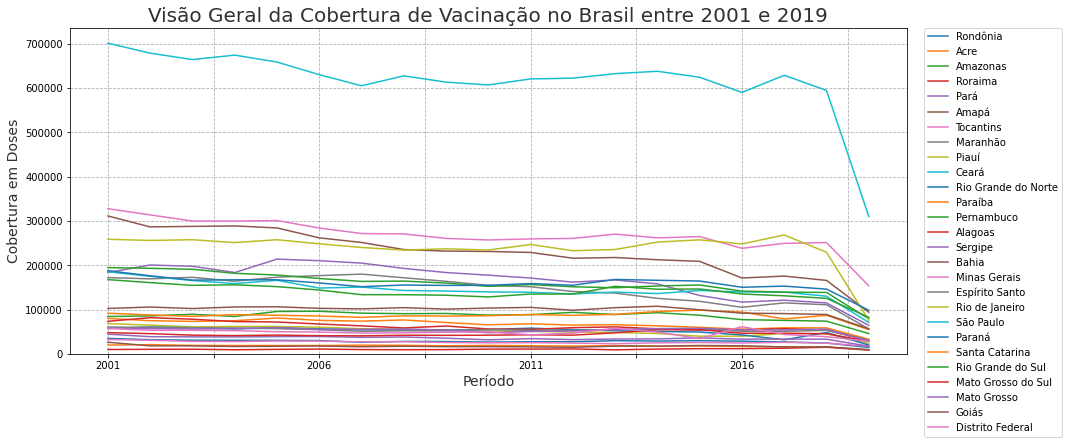

In [12]:
plot_simples(df_cv.T,'Visão Geral da Cobertura de Vacinação no Brasil entre 2001 e 2019','Período','Cobertura em Doses','line')

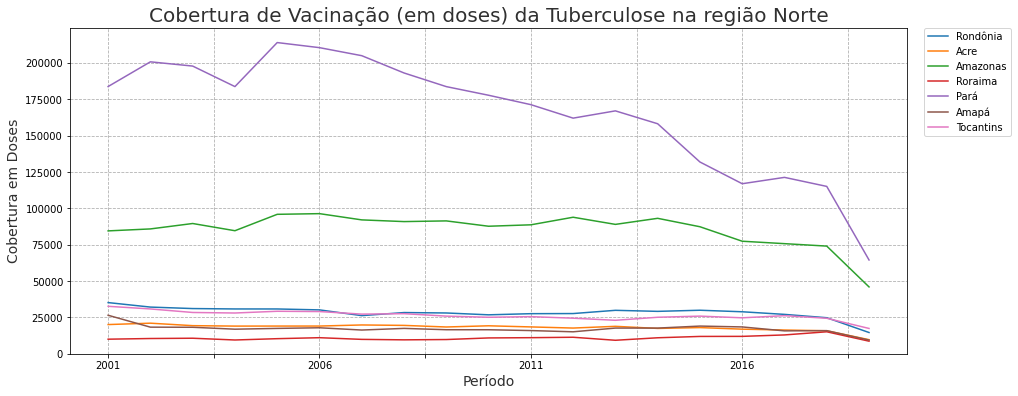

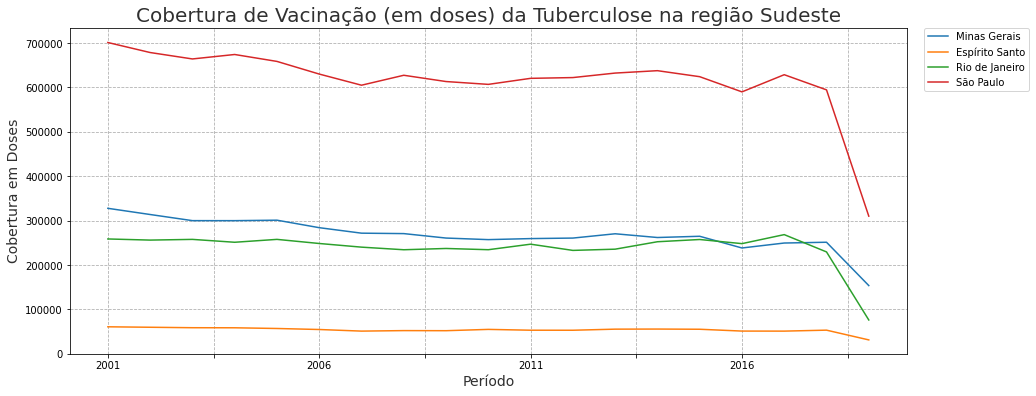

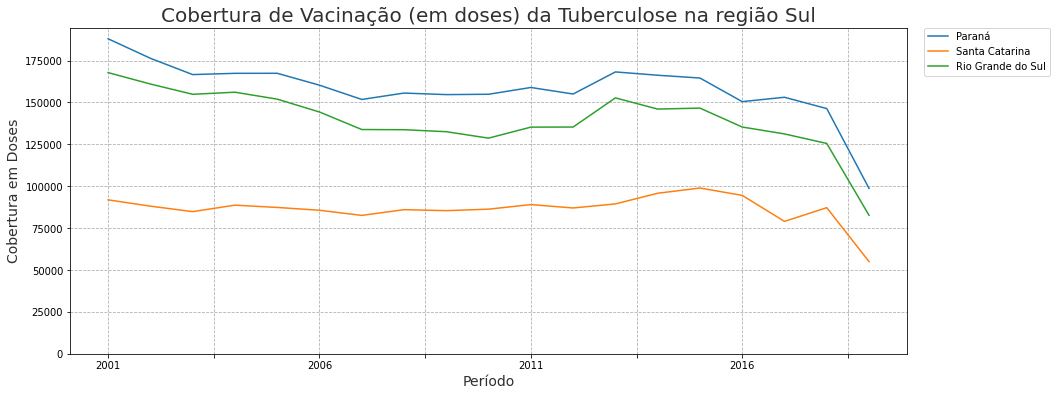

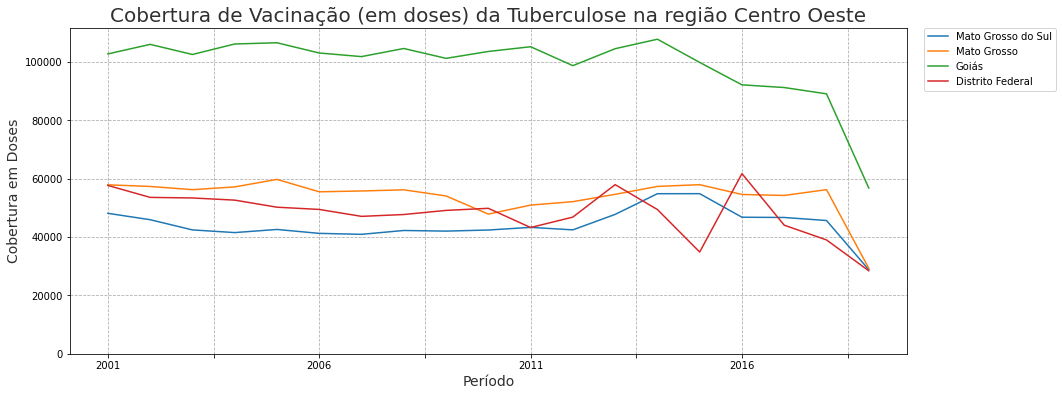

In [13]:
plot_simples(df_cv.loc[norte].T,'Cobertura de Vacinação (em doses) da Tuberculose na região Norte','Período','Cobertura em Doses','line')
plot_simples(df_cv.loc[sudeste].T,'Cobertura de Vacinação (em doses) da Tuberculose na região Sudeste','Período','Cobertura em Doses','line')
plot_simples(df_cv.loc[sul].T,'Cobertura de Vacinação (em doses) da Tuberculose na região Sul','Período','Cobertura em Doses','line')
plot_simples(df_cv.loc[centro_oeste].T,'Cobertura de Vacinação (em doses) da Tuberculose na região Centro Oeste','Período','Cobertura em Doses','line')

###Hipóteses



*   No geral, na maioria dos estados, houve uma constância na cobertura de vacinação com base no número de doses, ao longo dos anos.
*   O estado do **Pará** foi o estado que mais mostrou queda na cobertura de vacinação desde 2005.



##Visão Geral dos Casos

In [14]:
df_casos.head()

2001  2002  2003  2004  2005  ...  2015  2016  2017  2018  2019
uf                                      ...                              
Rondônia   674   639   651   628   630  ...   665   775   780   678   740
Acre       364   368   368   356   329  ...   361   450   484   483   582
Amazonas  2334  2286  2375  2559  2477  ...  3404  3259  3693  3803  3955
Roraima    150   172   206   218   155  ...   174   160   205   265   324
Pará      3517  3785  3940  4089  3975  ...  3991  4224  4511  4678  5542

[5 rows x 19 columns]

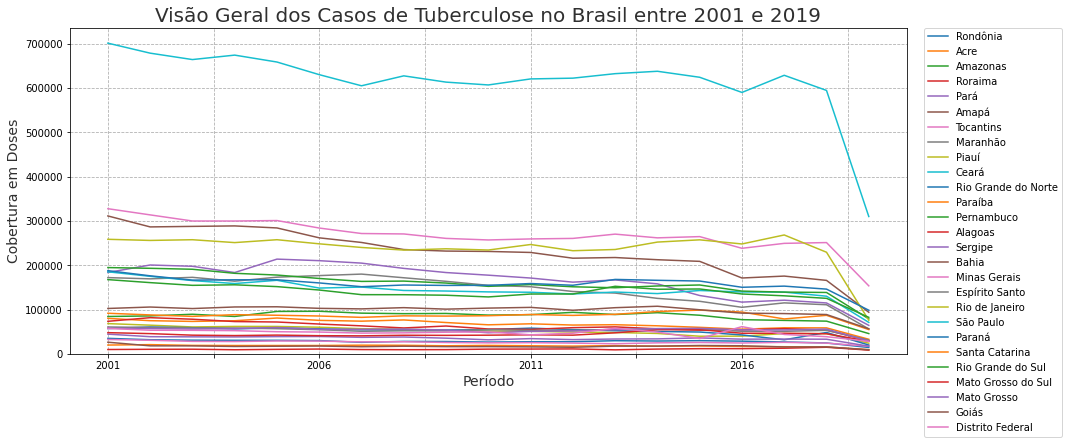

In [15]:
plot_simples(df_cv.T,'Visão Geral dos Casos de Tuberculose no Brasil entre 2001 e 2019','Período','Cobertura em Doses','line')

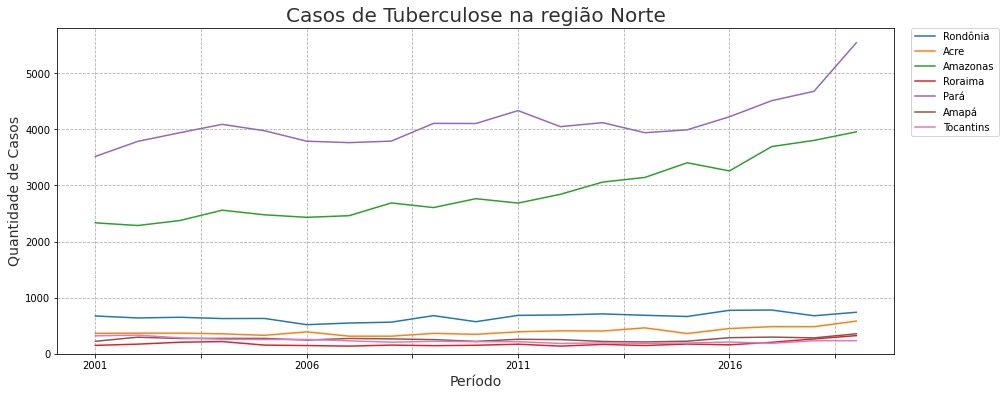

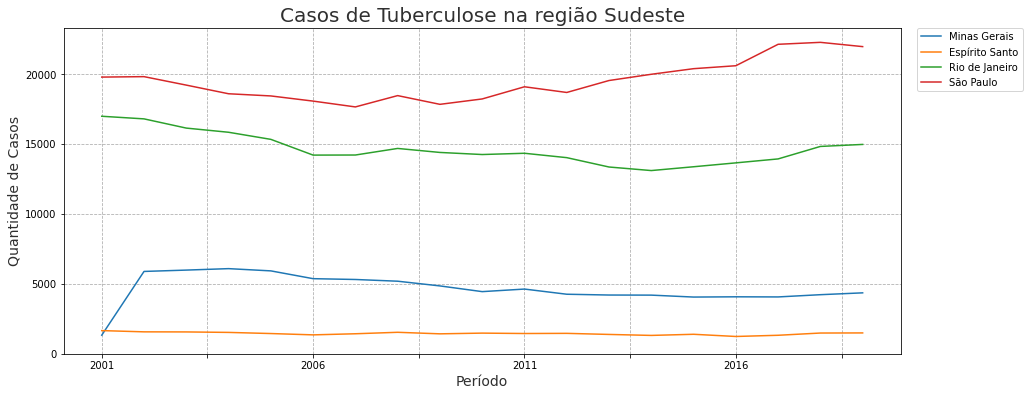

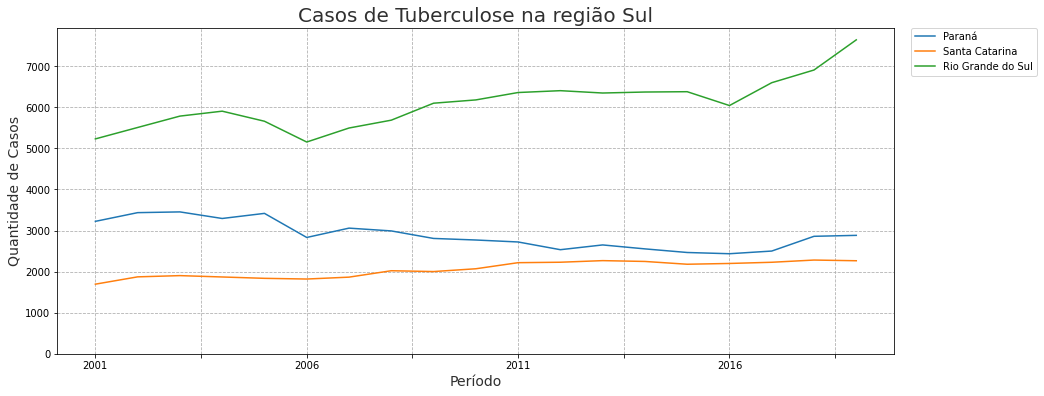

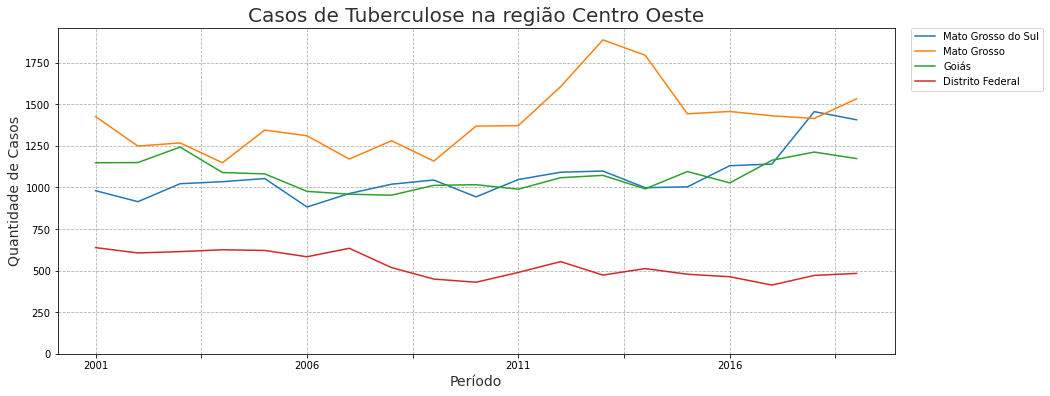

In [16]:
plot_simples(df_casos.loc[norte].T,'Casos de Tuberculose na região Norte','Período','Quantidade de Casos','line')
plot_simples(df_casos.loc[sudeste].T,'Casos de Tuberculose na região Sudeste','Período','Quantidade de Casos','line')
plot_simples(df_casos.loc[sul].T,'Casos de Tuberculose na região Sul','Período','Quantidade de Casos','line')
plot_simples(df_casos.loc[centro_oeste].T,'Casos de Tuberculose na região Centro Oeste','Período','Quantidade de Casos','line')

###Hipóteses



*   A região **Sudeste** é que mais registra casos por ano.
*   Na região **Norte**, excluindo Pará e Amazonas, os demais estados registraram a menor quantidade de casos por ano, se comparado aos demais estados. Os estados do **Pará** e **Amazonas** apresentam crescimento no número de casos/ano ao longos dos últimos anos.



##Visão Geral das Faixas Etárias

In [17]:
df_idade.head()

<1 Ano  1-4  5-9  10-14  15-19  ...  40-59  60-64  65-69  70-79  80 e +
uf                                        ...                                    
Rondônia      70  142  107    202    788  ...   3728    588    407    518     204
Acre          37   83   65    151    571  ...   1813    304    240    302     140
Amazonas     331  838  744   1232   4561  ...  14482   2422   1901   2527    1233
Roraima       18   59   50     83    240  ...    990    159    116    140      57
Pará         434  579  571   1292   5917  ...  21907   3486   2674   3290    1189

[5 rows x 11 columns]

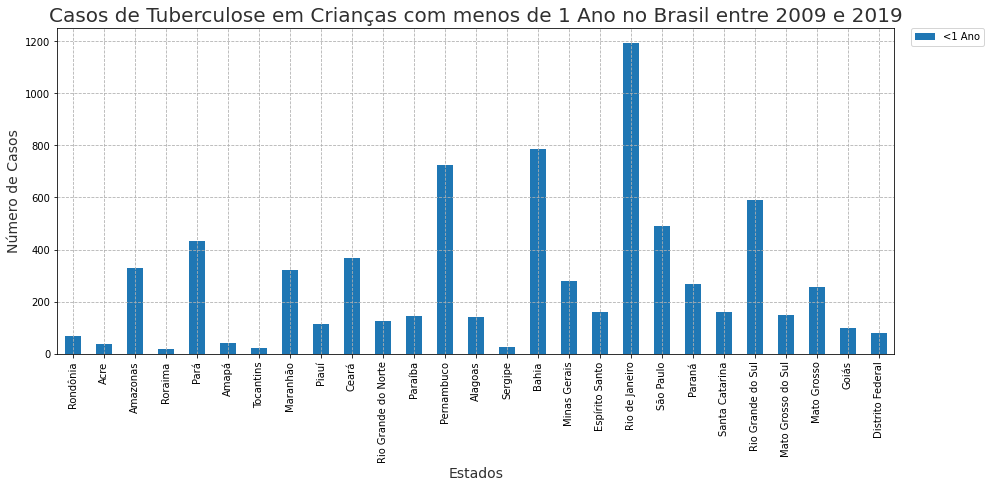

In [18]:
plot_simples(df_idade['<1 Ano'],'Casos de Tuberculose em Crianças com menos de 1 Ano no Brasil entre 2009 e 2019','Estados','Número de Casos','bar')

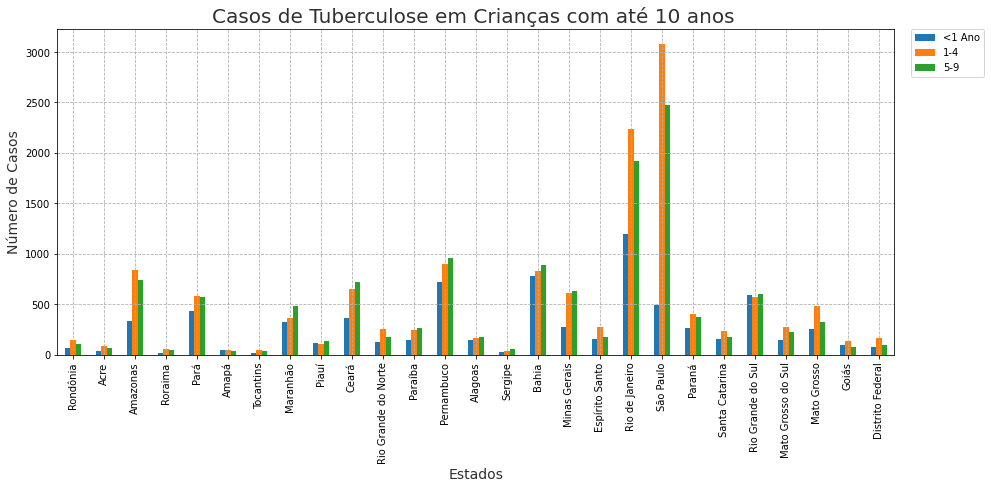

In [19]:
plot_simples(df_idade.loc[:,'<1 Ano':'5-9'],'Casos de Tuberculose em Crianças com até 10 anos ','Estados','Número de Casos','bar')

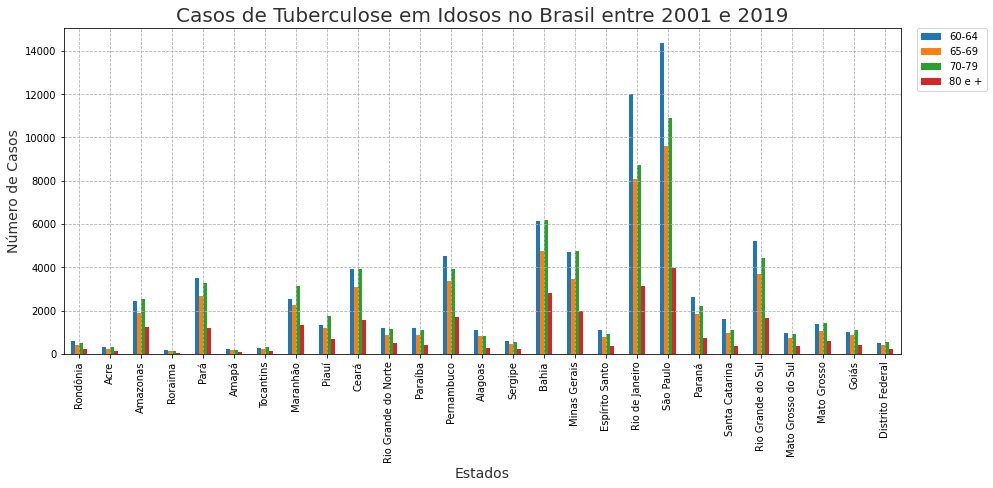

In [20]:
plot_simples(df_idade.loc[:,'60-64':'80 e +'],'Casos de Tuberculose em Idosos no Brasil entre 2001 e 2019','Estados','Número de Casos','bar')

###Hipóteses



*   O estado do **Rio de Janeiro** foi o estado que mais apresentou registro de Tuberculose em crianças com menos de **1 ano** de idade entre 2001 e 2019.
*   No geral, crianças de maiores que **1 ano** registraram mais casos que as menores.




##Visão Geral dos casos por sexo

In [21]:
df_sexo.head()

Masculino  Feminino
uf                           
Rondônia       8500      4017
Acre           4839      2705
Amazonas      33394     21431
Roraima        2231      1157
Pará          49219     29008

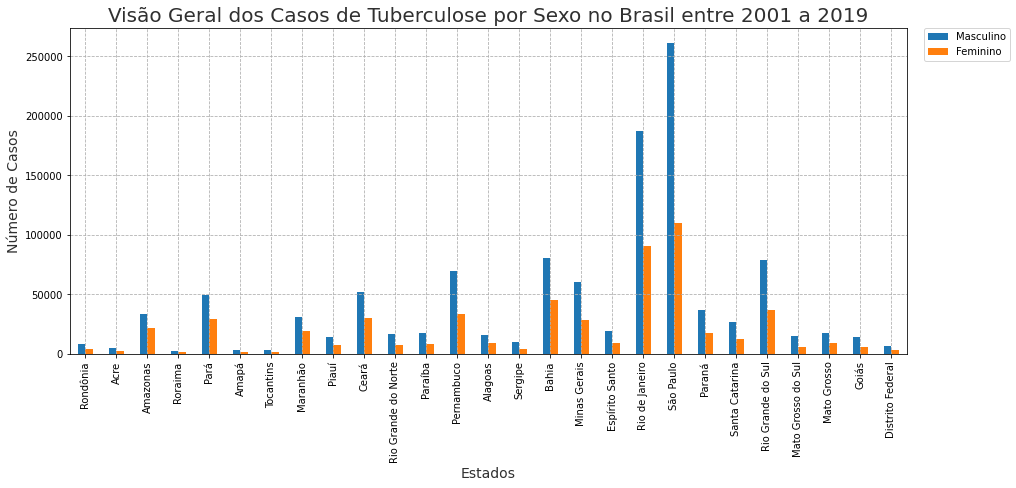

In [22]:
plot_simples(df_sexo,'Visão Geral dos Casos de Tuberculose por Sexo no Brasil entre 2001 a 2019','Estados','Número de Casos','bar')

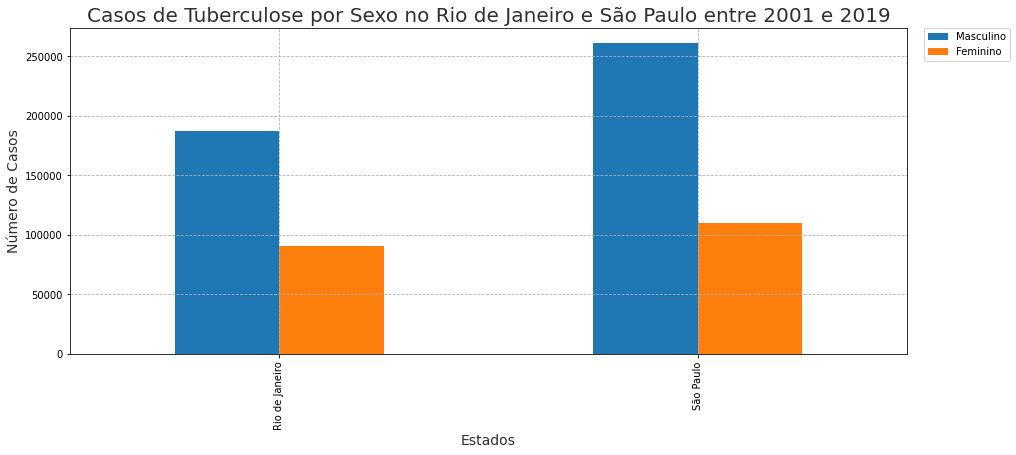

In [23]:
plot_simples(df_sexo.loc[df_sexo.index[18:20].tolist()],'Casos de Tuberculose por Sexo no Rio de Janeiro e São Paulo entre 2001 e 2019','Estados','Número de Casos','bar')

###Hipóteses



*   Predominantemente, é registrado mais casos de Tuberculose em pessoas do sexo Masculino ao Feminino.
*   No estado de **São Paulo** e **Rio de Janeiro**, a diferença de casos entre sexo chega a ser próxima ao **dobro**.



#Explorando Hipóteses

##Importando dados de População

In [24]:
populacao = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
populacao = populacao[0]
populacao.head()

Posição Unidade federativa  ... % da pop. total País comparável (habitantes)
0        1          São Paulo  ...           21,9%         Espanha (46 439 864)
1        2       Minas Gerais  ...           10,1%       Sri Lanka (20 675 000)
2        3     Rio de Janeiro  ...            8,2%   Países Baixos (16 922 900)
3        4              Bahia  ...            7,1%           Chade (14 037 000)
4        5             Paraná  ...            5,4%         Bolívia (11 410 651)

[5 rows x 5 columns]

In [25]:
  populacao = populacao.dropna()
  populacao['populacao'] = populacao['População'].str.replace(' ', '').astype(int)
  populacao['uf'] = populacao['Unidade federativa']
  populacao = populacao[['populacao', 'uf']].set_index('uf')
  populacao.index = populacao.index.str.strip()

In [26]:
populacao.head()

populacao
uf                       
São Paulo        46289333
Minas Gerais     21292666
Rio de Janeiro   17366189
Bahia            14930634
Paraná           11516840

##Constância na Cobertura

Hipótese:

*   No geral, na maioria dos estados, houve uma constância na cobertura de vacinação com base no número de doses, ao longo dos anos.

In [27]:
cv_recente = df_cv[['2019']]
casos_recente = df_casos[['2019']]

In [28]:
cv_pop = pop_estado(populacao,cv_recente)
casos_pop = pop_estado(populacao,casos_recente)

In [29]:
cv_pop['perc'] = (cv_pop['2019'] / cv_pop['populacao']) * 100
casos_pop['perc'] = (casos_pop['2019'] / casos_pop['populacao']) * 100

In [30]:
cv_pop_ordenado = cv_pop.sort_values(by='perc', ascending=False)

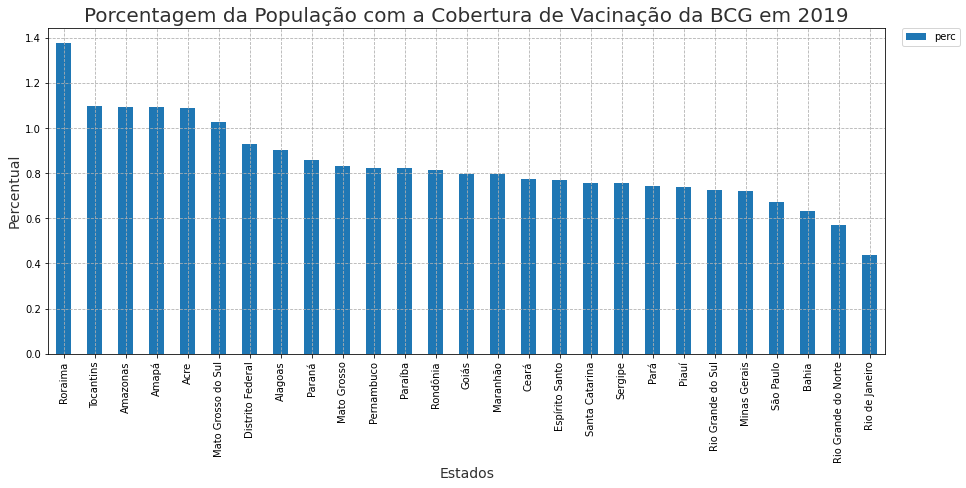

In [31]:
plot_simples(cv_pop_ordenado['perc'],'Porcentagem da População com a Cobertura de Vacinação da BCG em 2019','Estados','Percentual','bar')

###Conclusão

>Como vimos no gráfico de **Visão Geral da Cobertura de Vacinação**, a maioria dos estados seguem uma regularidade na Cobertura de Vacinação da população, e, o gráfico anterior nos mostra a porcentagem da população que está essa 
cobertura.

> A maioria dos estados seguem com um padrão de **0,8%** da população coberta pela vacina BCG, com exceção nos estados do norte que estão no início do gráfico, e ao Rio de Janeiro que se encontra ao fim dele.

##Estado do Pará

Hipótese:


*   O estado do **Pará** foi o estado que mais mostrou queda na cobertura de vacinação desde 2005.

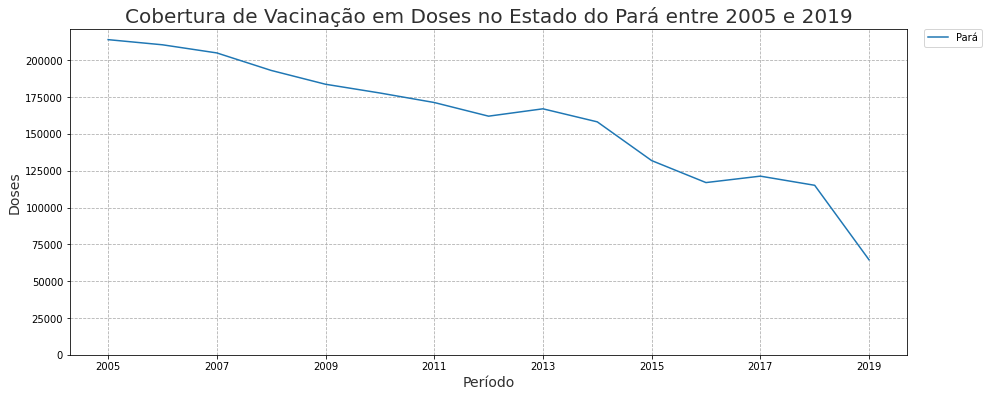

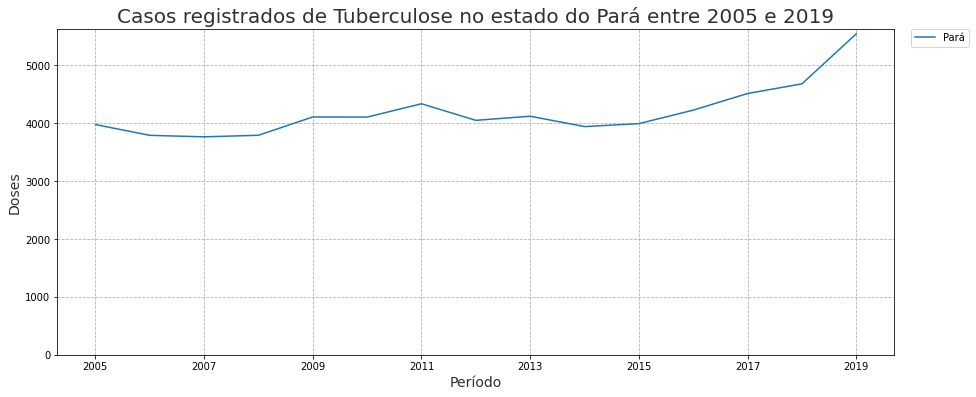

In [32]:
plot_simples(df_cv.loc['Pará','2005':'2019'],'Cobertura de Vacinação em Doses no Estado do Pará entre 2005 e 2019','Período','Doses','line')
plot_simples(df_casos.loc['Pará','2005':'2019'],'Casos registrados de Tuberculose no estado do Pará entre 2005 e 2019','Período','Doses','line')

In [33]:
(df_casos.loc['Pará','2019'] / cv_pop.loc['Pará','populacao'])*100

0.06376898643326895

###Conclusão

>É possível identificar uma considerável queda de cobertura de vacinação da BCG, sendo que de 2008 a 2018 foi diminuido pela metade este valor.

>Além disso, no gráfico seguinte é possível identificar uma crescente no número de casos de **Tuberculose**. Olhando os dois gráficos juntos, é possível identificar que estão se alinhando à medida em que a cobertura de vacinação cai o número de casos aumenta.

>Não é possível constatar uma relação causalidade, mas os dados nos passam uma informação que há indícios dessa relação.

##Casos Região Sudeste

Hipótese:

*   A região **Sudeste** é que mais registra casos por ano.

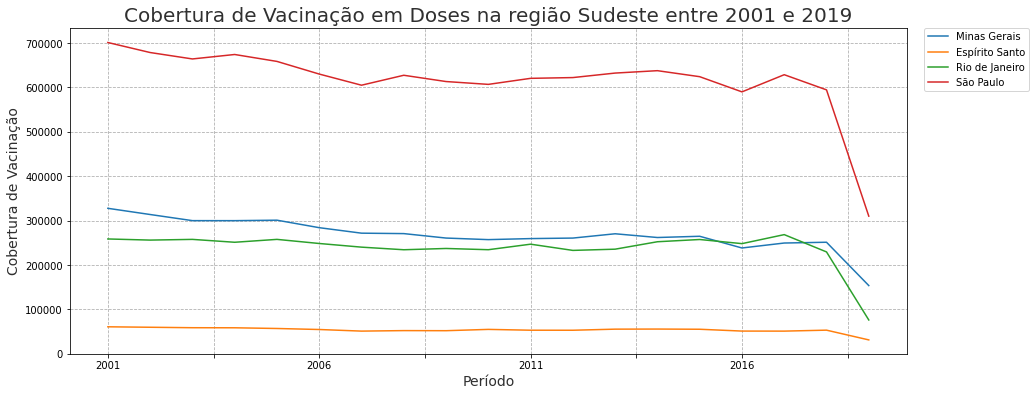

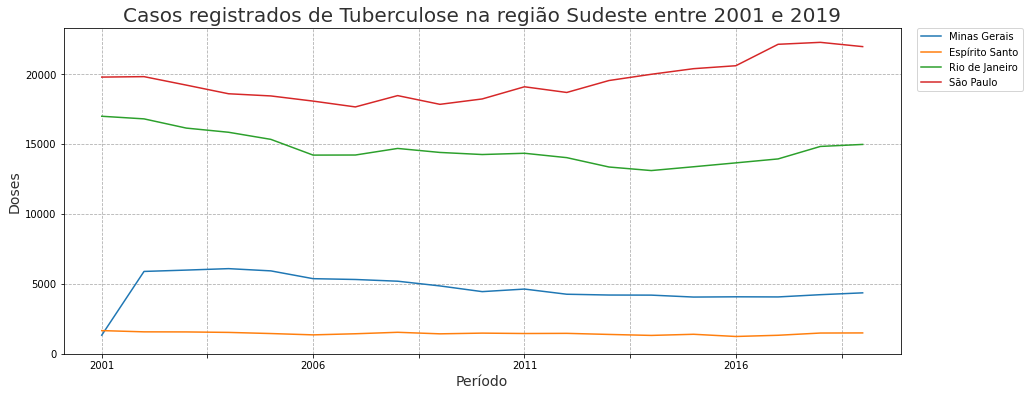

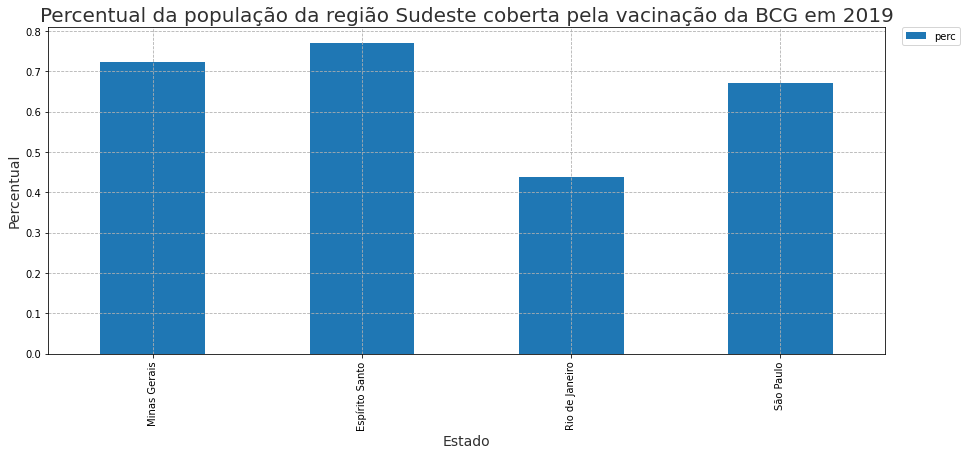

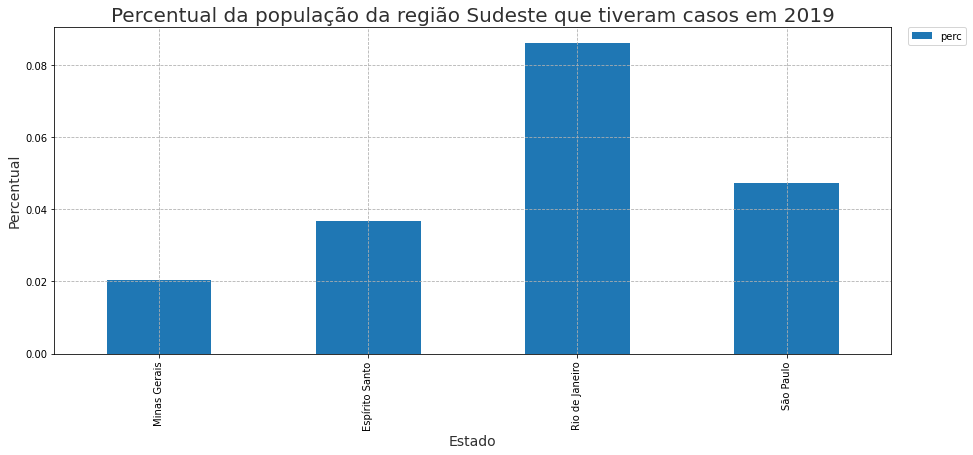

In [34]:
plot_simples(df_cv.loc[sudeste].T,'Cobertura de Vacinação em Doses na região Sudeste entre 2001 e 2019','Período','Cobertura de Vacinação','line')
plot_simples(df_casos.loc[sudeste].T,'Casos registrados de Tuberculose na região Sudeste entre 2001 e 2019','Período','Doses','line')
plot_simples(cv_pop.loc[sudeste,'perc'],'Percentual da população da região Sudeste coberta pela vacinação da BCG em 2019','Estado','Percentual','bar')
plot_simples(casos_pop.loc[sudeste,'perc'],'Percentual da população da região Sudeste que tiveram casos em 2019','Estado','Percentual','bar')

###Conclusão

>A região Sudeste por mais que apareça no **topo** do número de **Cobertura de Vacinação**, é uma região que apresenta um percentual baixo da população que se contagiou com **Tuberculose**

> Nos gráficos anteriores podemos perceber que o percentual da população não chega a **0,1%** que sofreram com a bactéria.

##Casos Região Norte

*   Na região **Norte**, excluindo Pará e Amazonas, os demais estados registraram a menor quantidade de casos por ano, se comparado aos demais estados. Os estados do **Pará** e **Amazonas** apresentam crescimento no número de casos/ano ao longos dos últimos anos.

In [35]:
cv_aberto = df_cv.reset_index().melt(id_vars=['uf'], value_vars=df_cv.columns)
casos_aberto = df_casos.reset_index().melt(id_vars=['uf'], value_vars=df_casos.columns)

In [36]:
cv_aberto.columns = ['uf', 'ano', 'doses']
casos_aberto.columns = ['uf', 'ano', 'casos']

In [37]:
cv_aberto_pop = cv_aberto.join(populacao['populacao'], on='uf')

In [38]:
ls_norte = ['Acre','Amapá','Amazonas','Pará','Rondônia','Roraima','Tocantins']
ls_nordeste = ['Alagoas','Bahia','Ceará','Maranhão','Paraíba','Piauí','Pernambuco','Rio Grande do Norte','Sergipe']
ls_centro_oeste = ['Distrito Federal','Goiás','Mato Grosso','Mato Grosso do Sul']
ls_sudeste = ['Espírito Santo','Minas Gerais','Rio de Janeiro','São Paulo']
ls_sul = ['Paraná','Rio Grande do Sul','Santa Catarina']

In [39]:
cv_norte = cv_aberto_pop.query('uf in @ls_norte').groupby(['uf','ano']).sum().reset_index()
casos_norte = casos_aberto.query('uf in @ls_norte').groupby(['uf','ano']).sum().reset_index()

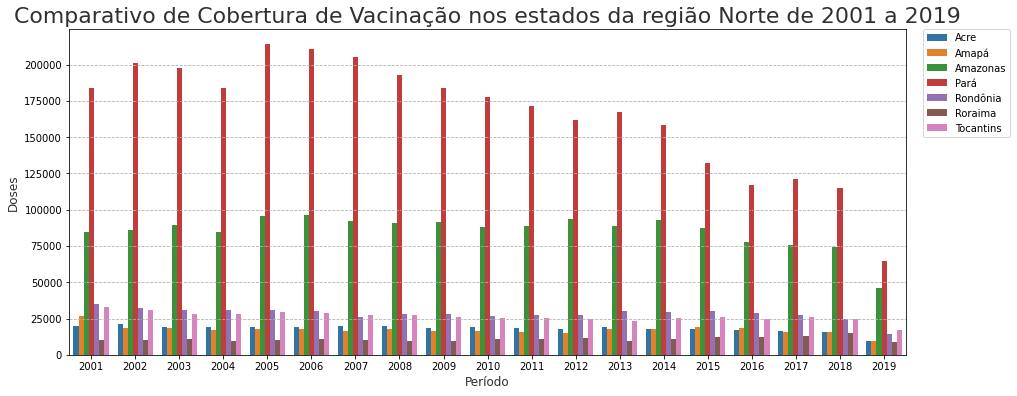

In [40]:
barplot_sns(cv_norte,'Comparativo de Cobertura de Vacinação nos estados da região Norte de 2001 a 2019','Período','Doses','ano','doses','uf',0)

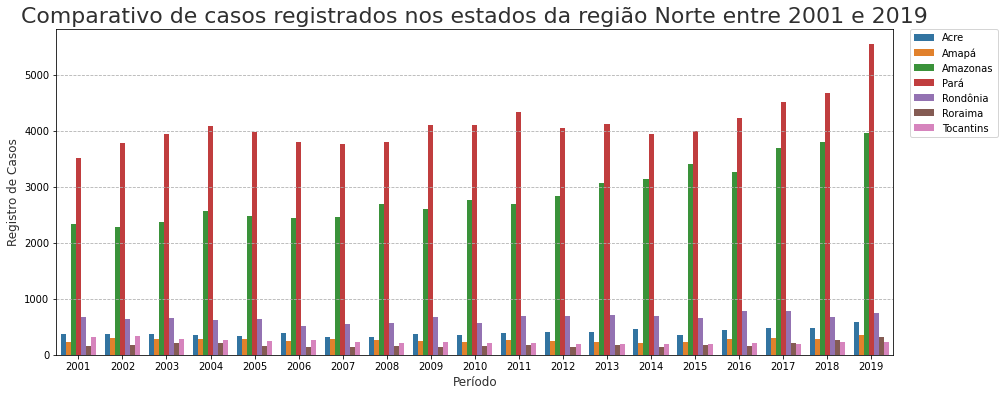

In [41]:
barplot_sns(casos_norte,'Comparativo de casos registrados nos estados da região Norte entre 2001 e 2019','Período','Registro de Casos','ano','casos','uf',0)

###Conclusão

> Assim como foi citado na hipótese do **Estado do Pará**, aqui é possível fazer um comparativo sobre **Cobertura de Vacinação** e **Registro de Casos** dos estados da região Norte. 

>A região Norte, apresenta um crescente número de casos registrados de **Tuberculose**, puxada principalmente pelos estados do **Pará** e **Amazonas**, conforme os gráficos mostrados anteriormente, e também corroborados na hipótese passada.

## Casos em Crianças

Hipóteses:

*   O estado do **Rio de Janeiro** foi o estado que mais apresentou registro de Tuberculose em crianças com menos de **1 ano** de idade entre 2001 e 2019.
*   No geral, crianças de maiores que **1 ano** registraram mais casos que as menores.

In [42]:
casos_rj = casos_aberto.query('uf == "Rio de Janeiro"').groupby(['uf','ano']).sum().reset_index()

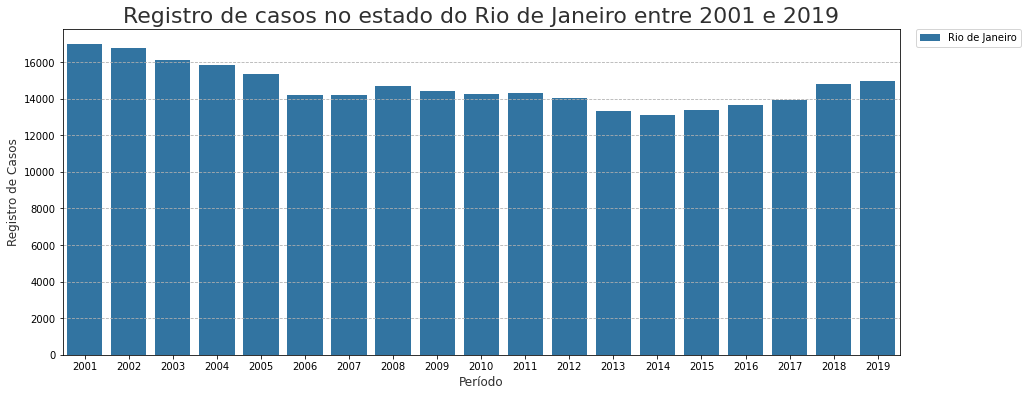

In [43]:
barplot_sns(casos_rj,'Registro de casos no estado do Rio de Janeiro entre 2001 e 2019','Período','Registro de Casos','ano','casos','uf',0)

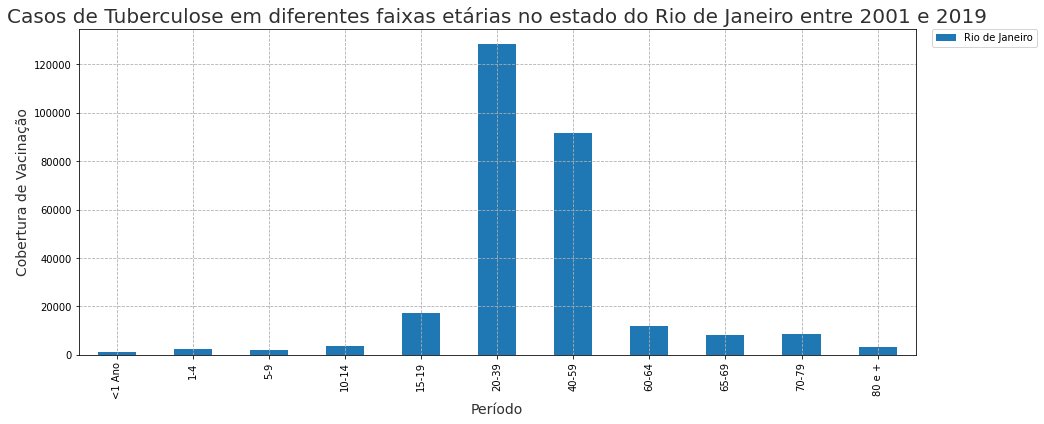

In [44]:
plot_simples(df_idade.loc['Rio de Janeiro'],'Casos de Tuberculose em diferentes faixas etárias no estado do Rio de Janeiro entre 2001 e 2019','Período','Cobertura de Vacinação','bar')

###Conclusão

>Utilizamos o estado do Rio de Janeiro para aprofundar as análises pois ele que apresentou o maior número de casos em crianças com menos de 1 ano. E, pelo fato da **BCG** ser uma vacina aplicada nessa faixa de idade, chamou a atenção.

>Podemos verificar que, apesar das crianças com menos de 1 ano no Rio de Janeiro apresentarem um maior número de casos na hipótese anterior, a concentração dos casos ficam na faixa etária de 20 a 59 anos de idade. Sendo a faixa de 20 a 39 anos a mais registrada.

##Casos em Homens e Mulheres

Hipóteses:

*   Predominantemente, é registrado mais casos de Tuberculose em pessoas do sexo Masculino ao Feminino.
*   No estado de **São Paulo** e **Rio de Janeiro**, a diferença de casos entre sexo chega a ser próxima ao **dobro**.

In [45]:
sexo_aberto = df_sexo.reset_index().melt(id_vars=['uf'], value_vars=df_sexo.columns)

In [46]:
sexo_aberto.columns = ['uf', 'sexo', 'casos']

In [47]:
sexo_aberto_pop = sexo_aberto.join(populacao['populacao'], on='uf')

In [48]:
sexo_aberto_pop['perc'] = (sexo_aberto_pop['casos'] / sexo_aberto_pop['populacao']) *100

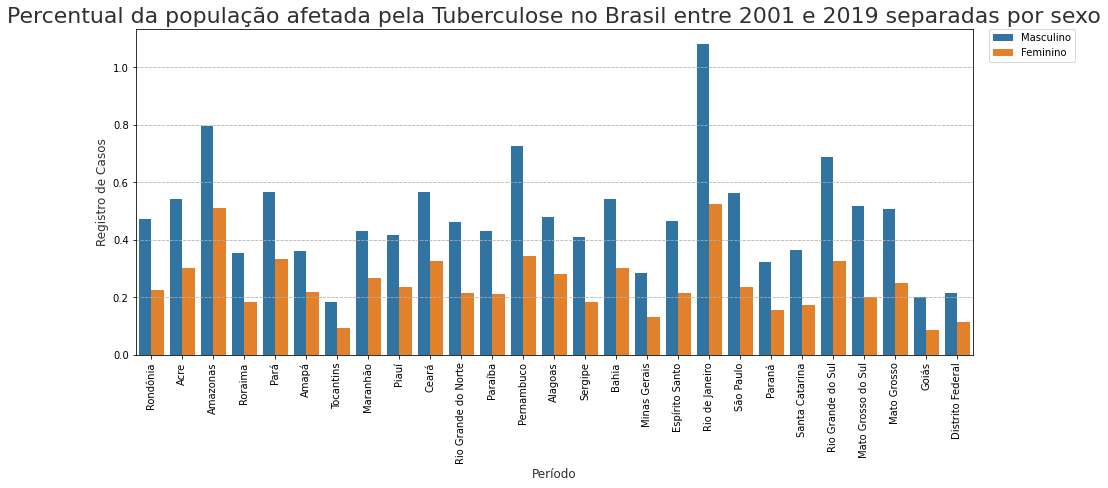

In [49]:
barplot_sns(sexo_aberto_pop,'Percentual da população afetada pela Tuberculose no Brasil entre 2001 e 2019 separadas por sexo','Período','Registro de Casos','uf','perc','sexo',90)

###Conclusão

>Foi constatado que a tuberculose atinge mais o sexo **masculino** ao **feminino**.

> Trazendo isso para uma proporção da população, podemos identificar que, por exemplo, no estado do Rio de Janeiro, quase o dobro dos casos de **Tuberculose** foram registrados em pessoas do sexo **masculino**.

> Nos demais estados, essa diferença é menor se comparado ao estado do Rio de Janeiro, porém, ainda sim existe uma notável diferença.

#Referências
[[1] Vacina BCG - SBIM](https://familia.sbim.org.br/vacinas/vacinas-disponiveis/vacina-bcg)

[[2] Tuberculose - SBIM](https://familia.sbim.org.br/doencas/tuberculose-tb)

[[3] O DATASUS](http://www2.datasus.gov.br/DATASUS/index.php?area=01)

[[4] TabNet](http://www2.datasus.gov.br/DATASUS/APRESENTACAO/TABNET/Tutorial_tabNet_FINAL.pptx_html/html/index.html#2)

#Agradecimentos

Este projeto faz parte do **Bootcamp de Data Science Aplicada** da **Alura**, referente ao módulo 2 do mesmo.

Obriado ao pessoal da Alura pelo conhecimento que vem sendo distribuído.

---

<img src='https://avatars.githubusercontent.com/u/82285207?v=4' height='200'>

[Github](https://github.com/enzoulian)

[Linkedin](linkedin.com/in/enzo-dias-ulian-5710aa139)
